
# Binary Prediction of Poisonous Mushrooms 
## Supervised Learning - IART 2nd Assignment

The second practical assignment of IART focuses on the application of Supervised Learning techniques in
the context of classification problems. The goal is to develop and evaluate machine learning models capable
of learning from labeled data to make accurate predictions regarding a specific target variable (or concept).

## Machine Learning Problem
In this notebook, we will work with a dataset containing information about various mushroom species to predict whether a mushroom is poisonous or edible, in a binary classification problem. Using this dataset, we will explore different classification algorithms and evaluate their performance in predicting the target variable.


### Methodology
Using the previously balanced dataset, we will apply various supervised learning algorithms to build a model that can accurately classify mushrooms as poisonous or edible. The dataset will be split into training and testing sets, and the models will be evaluated based on their performance metrics, including accuracy, precision, recall, and F1-score. We will use Decision Trees, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM) as our classification algorithms. The models will be trained on the training set and evaluated on the testing set to assess their generalization performance. Additionally, we will perform hyperparameter tuning to optimize the models for better accuracy.

### 4. Load Libraries

In [27]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import time

### 5. First Model - Decision Tree Classifier
Decision Trees are a popular and interpretable classification algorithm that can handle both categorical and numerical data. They work by recursively splitting the data based on feature values to create a tree-like structure, where each leaf node represents a class label.

In [28]:
# Load the dataset
df = pd.read_csv('data/balanced_train.csv')

# Sampling for Prototyping (remove this for full training)
df = df.sample(n=1000000, random_state=420)

# Feature/Target Split
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)

# Use OrdinalEncoder (faster and scalable for Decision Trees)
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ]
)

# Define Pipeline with a Decision Tree
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=420))
    ]
)

# Train the Model (timed)
start_train = time.time()
pipeline.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.3f} seconds")

# Test the Model (timed)
start_test = time.time()
y_pred = pipeline.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.3f} seconds")


print(f"\nAccuracy: {(accuracy_score(y_test, y_pred)*100):.2f}%")


Training completed in 8.495 seconds

Testing completed in 0.699 seconds

Accuracy: 96.33%


### 5.1 Classification Reports, Confusion Matrix and Feature Importance

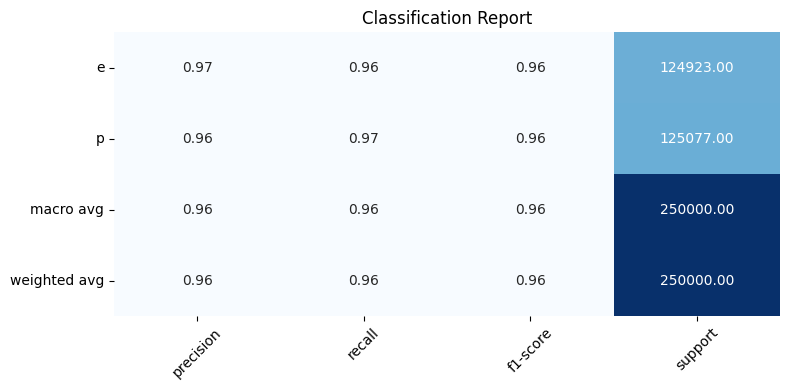

In [29]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

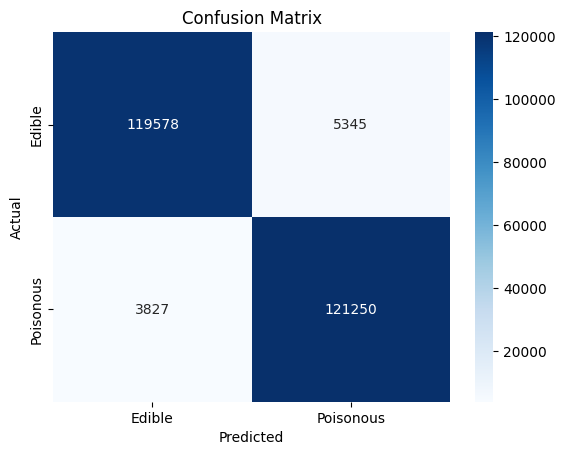

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Edible", "Poisonous"], 
            yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

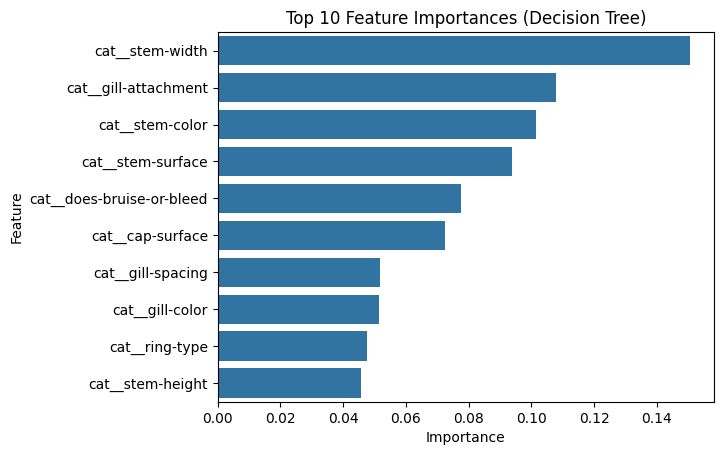

In [31]:
# Feature Importance
importances = pipeline.named_steps["classifier"].feature_importances_
feature_names = pipeline.named_steps["preprocessing"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.show()